In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd

In [3]:
train_data = pd.read_csv("/kaggle/input/ml-olympiad-toxic-language-ptbr-detection/train (2).csv")

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

In [5]:
def clean_text(text):
    # Remove non-alphanumeric characters including emojis
    text = re.sub('[^A-Za-zÀ-ÖØ-öø-ÿ]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text, language='portuguese')
    # Remove stopwords
    stop_words = set(stopwords.words('portuguese'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = SnowballStemmer('portuguese')
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

train_data['cleaned_text'] = train_data['text'].apply(clean_text)

In [6]:
X = train_data['cleaned_text']
y = train_data['label']

In [7]:
y = np.array(y)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [9]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [10]:
y_train

array([0, 1, 1, ..., 1, 0, 1])

In [11]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Convert target labels to one-hot encoding
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

2024-04-05 12:03:26.463515: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-05 12:03:26.463639: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-05 12:03:26.630437: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=200)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
for layer in range(10):
    model.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(2, activation="sigmoid"))

In [14]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [15]:
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

In [16]:
history = model.fit(X_train_dense, y_train_onehot, epochs=100, 
                    validation_data=(X_test_dense, y_test_onehot))

Epoch 1/100
 72/420 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5379 - loss: 0.6915

I0000 00:00:1712318622.466022      76 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712318622.480761      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5522 - loss: 0.6891 - val_accuracy: 0.5598 - val_loss: 0.6873
Epoch 2/100
  1/420 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5625 - loss: 0.6820

W0000 00:00:1712318623.952813      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5606 - loss: 0.6856 - val_accuracy: 0.5598 - val_loss: 0.6865
Epoch 3/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5706 - loss: 0.6825 - val_accuracy: 0.5598 - val_loss: 0.6859
Epoch 4/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5582 - loss: 0.6852 - val_accuracy: 0.5598 - val_loss: 0.6852
Epoch 5/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5616 - loss: 0.6836 - val_accuracy: 0.5598 - val_loss: 0.6846
Epoch 6/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5672 - loss: 0.6809 - val_accuracy: 0.5598 - val_loss: 0.6839
Epoch 7/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5693 - loss: 0.6799 - val_accuracy: 0.5598 - val_loss: 0.6832
Epoch 8/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5593 - loss: 0.6809 - val_accuracy: 0.5601 - val_loss: 0.6825
Epoch 9/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5562 - loss: 0.6810 - val_accuracy: 0.5601

In [17]:
import matplotlib.pyplot as plt

def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()

def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()

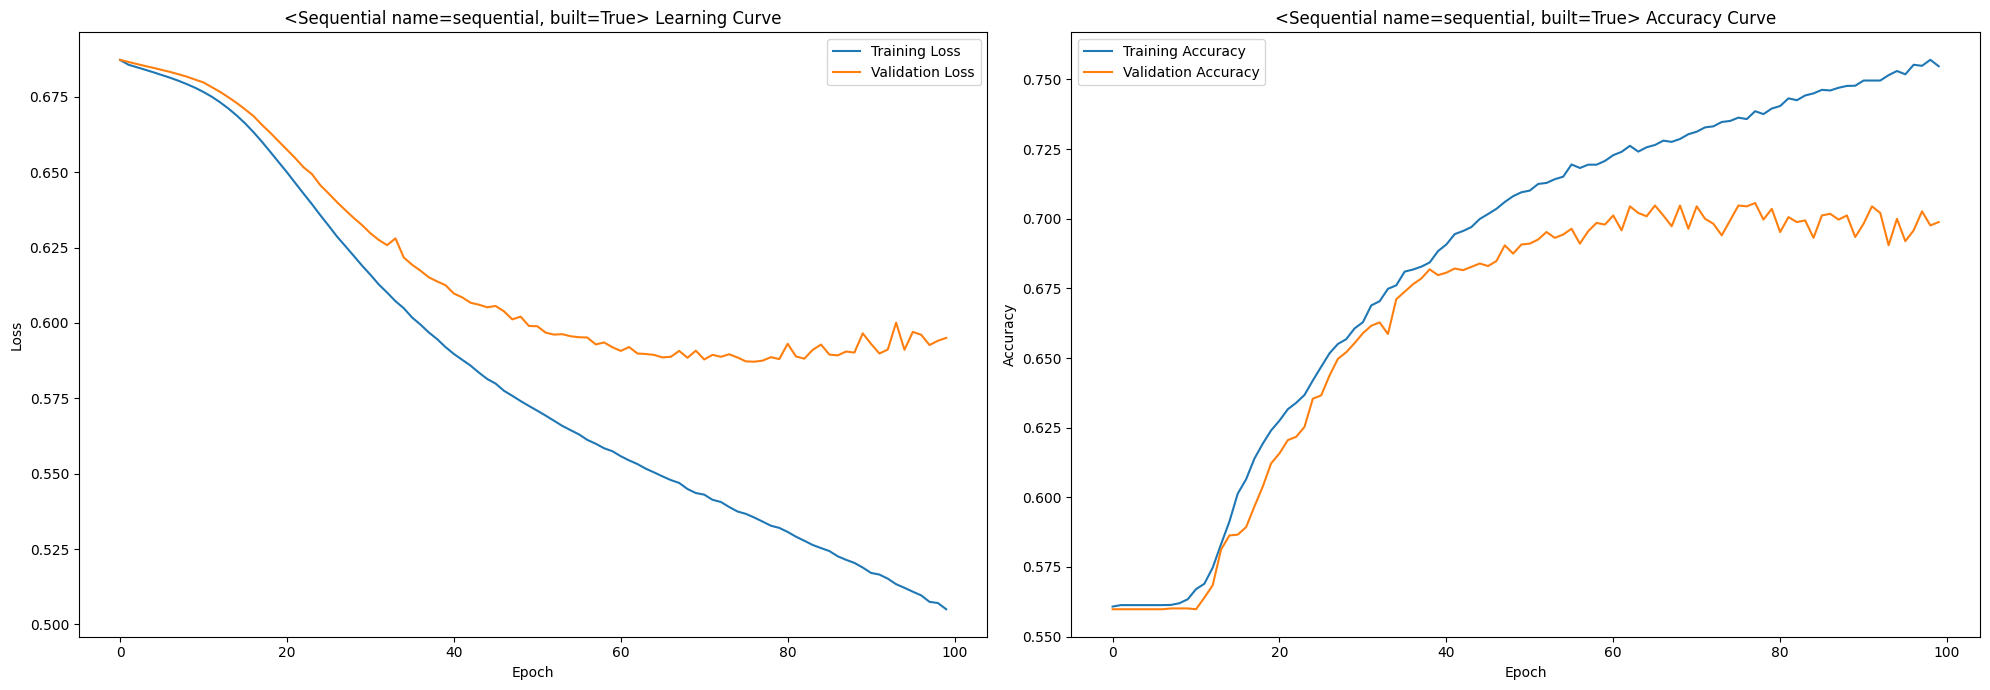

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))  
plot_learning_curves(history, model, axs[0])
plot_accuracy_curves(history, model, axs[1])

plt.tight_layout()
plt.show()

In [19]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
for layer in range(10):
    tf.keras.layers.BatchNormalization(),
    model.add(tf.keras.layers.Dense(100, activation=leaky_relu,
                                    kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))

In [21]:
model.compile(loss="categorical_crossentropy",
              optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
              metrics=["accuracy"])

In [22]:
history = model.fit(X_train_dense, y_train_onehot, epochs=50, 
                    validation_data=(X_test_dense, y_test_onehot))

Epoch 1/50
 68/420 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5535 - loss: 0.6864

W0000 00:00:1712318737.378553      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5655 - loss: 0.6821 - val_accuracy: 0.6122 - val_loss: 0.6594
Epoch 2/50


W0000 00:00:1712318738.947267      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6355 - loss: 0.6460 - val_accuracy: 0.6548 - val_loss: 0.6235
Epoch 3/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6659 - loss: 0.6163 - val_accuracy: 0.6836 - val_loss: 0.6043
Epoch 4/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6851 - loss: 0.5991 - val_accuracy: 0.6943 - val_loss: 0.5909
Epoch 5/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7019 - loss: 0.5784 - val_accuracy: 0.7039 - val_loss: 0.5850
Epoch 6/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7066 - loss: 0.5715 - val_accuracy: 0.7054 - val_loss: 0.5771
Epoch 7/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7144 - loss: 0.5643 - val_accuracy: 0.7089 - val_loss: 0.5734
Epoch 8/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7261 - loss: 0.5504 - val_accuracy: 0.7110 - val_loss: 0.5717
Epoch 9/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7264 - loss: 0.5531 - val_accuracy: 0.7119 - val_

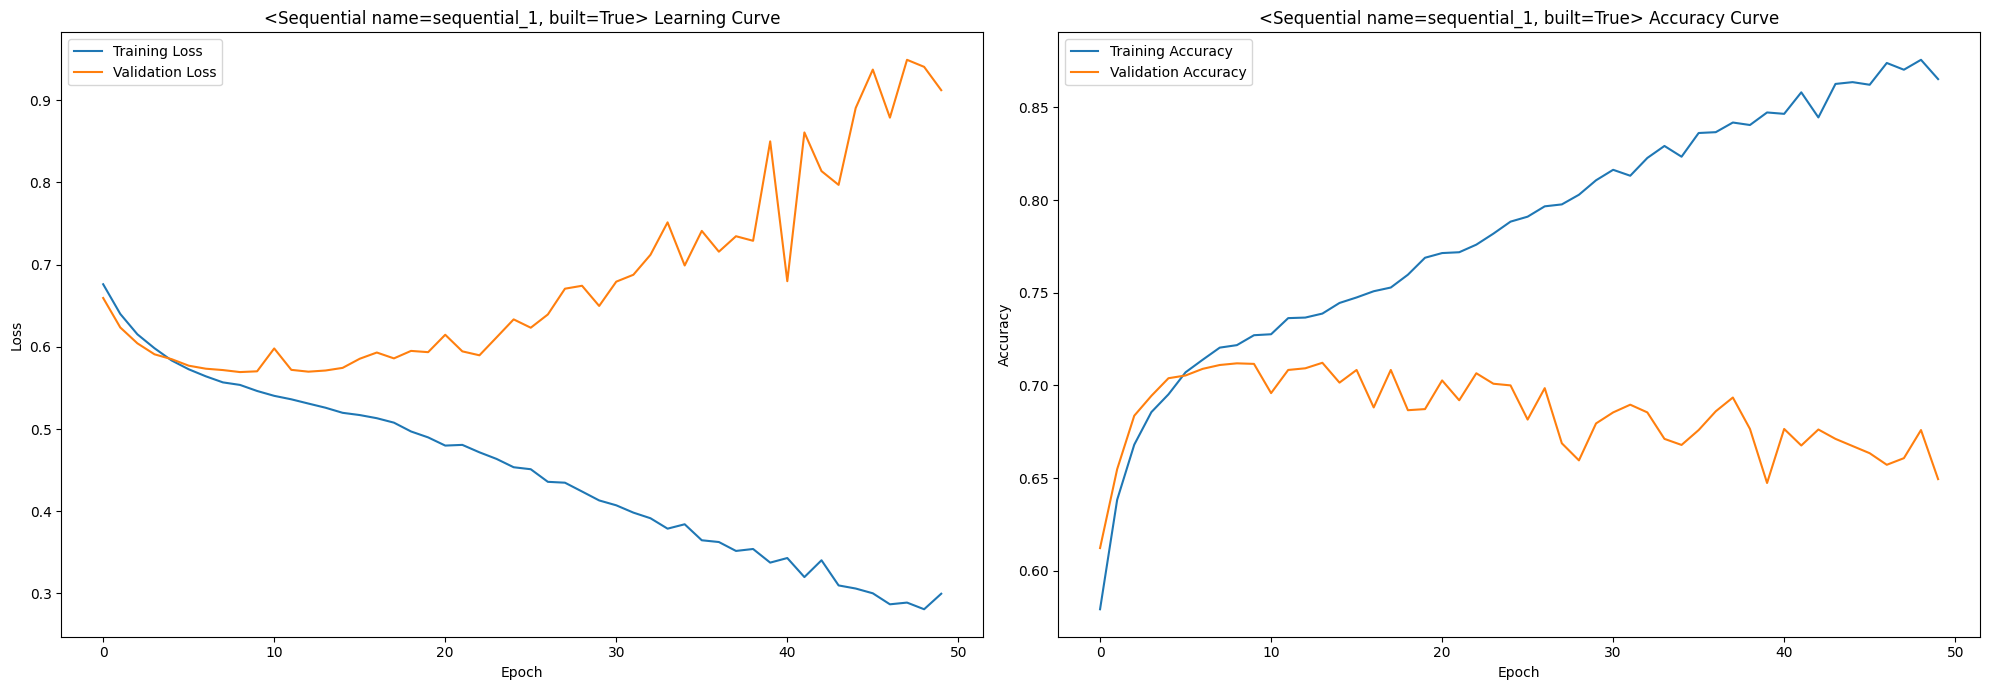

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))  
plot_learning_curves(history, model, axs[0])
plot_accuracy_curves(history, model, axs[1])

plt.tight_layout()
plt.show()

In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
for layer in range(10):
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    model.add(tf.keras.layers.Dense(100, activation=leaky_relu,
                                    kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(2, activation="sigmoid"))

In [25]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
                                    nesterov=True)
model.compile(loss="categorical_crossentropy",
              optimizer = optimizer,
              metrics=["accuracy"])
history = model.fit(X_train_dense, y_train_onehot, epochs=20, 
                    validation_data=(X_test_dense, y_test_onehot))

Epoch 1/20
 66/420 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5356 - loss: 0.6872

W0000 00:00:1712318803.203448      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5956 - loss: 0.6632 - val_accuracy: 0.6747 - val_loss: 0.6022
Epoch 2/20


W0000 00:00:1712318804.754805      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7025 - loss: 0.5838 - val_accuracy: 0.7158 - val_loss: 0.5705
Epoch 3/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7125 - loss: 0.5668 - val_accuracy: 0.7113 - val_loss: 0.5680
Epoch 4/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7117 - loss: 0.5598 - val_accuracy: 0.7152 - val_loss: 0.5650
Epoch 5/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7215 - loss: 0.5506 - val_accuracy: 0.7137 - val_loss: 0.5743
Epoch 6/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7280 - loss: 0.5422 - val_accuracy: 0.7083 - val_loss: 0.5657
Epoch 7/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7364 - loss: 0.5289 - val_accuracy: 0.7199 - val_loss: 0.5671
Epoch 8/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7301 - loss: 0.5345 - val_accuracy: 0.7167 - val_loss: 0.5891
Epoch 9/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7293 - loss: 0.5286 - val_accuracy: 0.7089 - val_

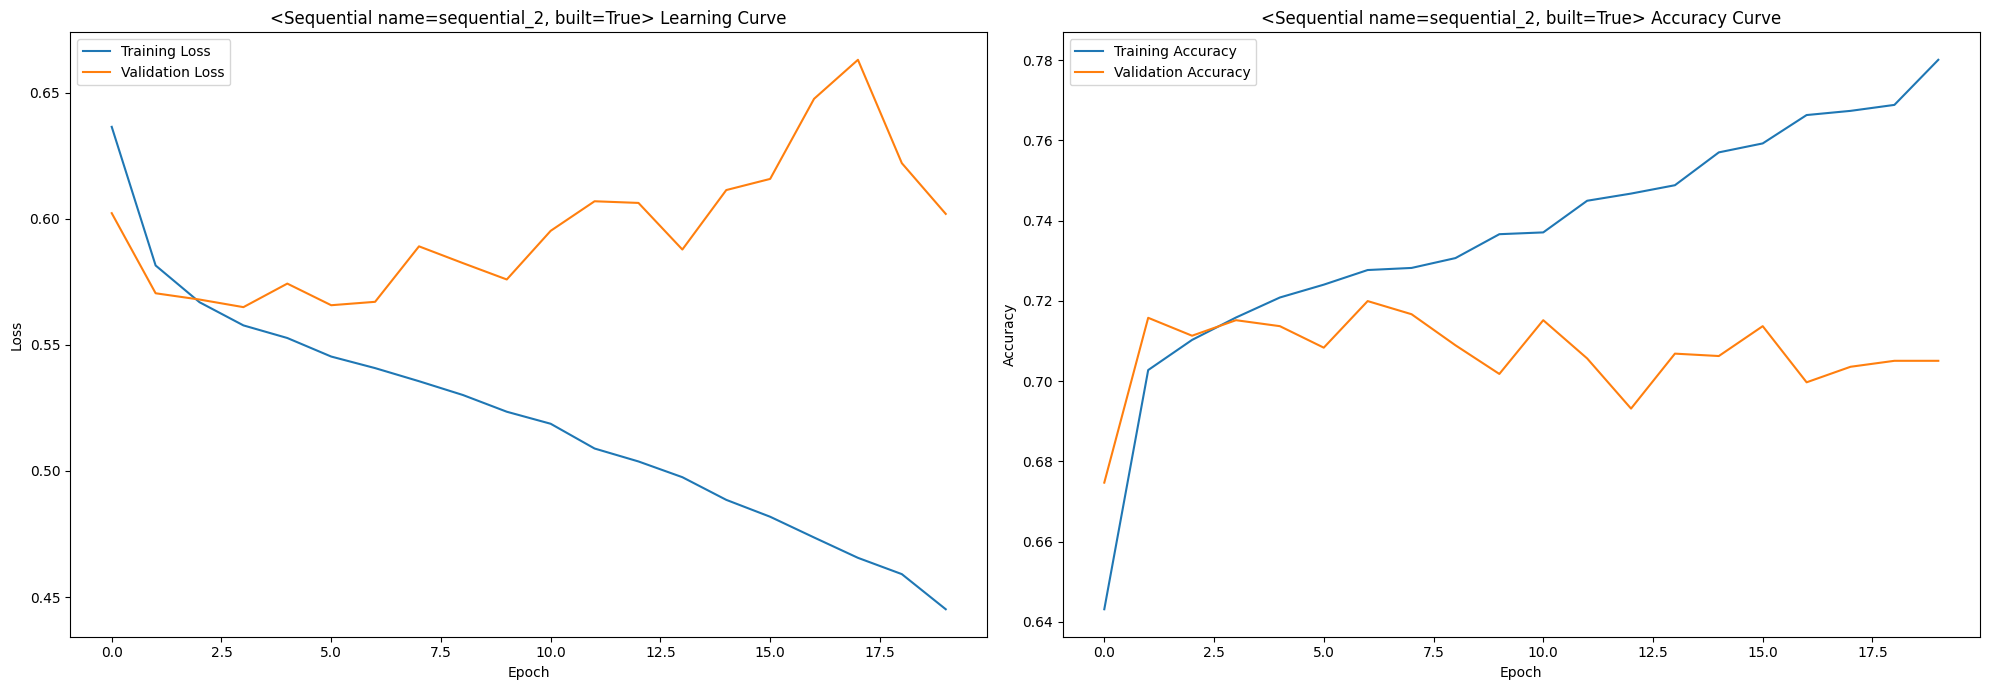

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))  
plot_learning_curves(history, model, axs[0])
plot_accuracy_curves(history, model, axs[1])

plt.tight_layout()
plt.show()

In [27]:
test_data = pd.read_csv("/kaggle/input/ml-olympiad-toxic-language-ptbr-detection/test (4).csv")

In [28]:
# test_data.head()

In [29]:
def clean_text(text):
   
    text = re.sub('[^A-Za-zÀ-ÖØ-öø-ÿ]', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text, language='portuguese')
    stop_words = set(stopwords.words('portuguese'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = SnowballStemmer('portuguese')
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

test_data['cleaned_text'] = test_data['text'].apply(clean_text)

In [30]:
# test_data.head()

In [31]:
test = tfidf_vectorizer.transform(test_data['cleaned_text'])
test = test.toarray()

In [32]:
test_predictions = model.predict(test)

101/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1712318837.343485      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [33]:
test_predictions

array([[0.66294837, 0.30836815],
       [0.5309389 , 0.47140232],
       [0.5540868 , 0.43147537],
       ...,
       [0.65844184, 0.3034779 ],
       [0.52546334, 0.48548973],
       [0.47705448, 0.5754773 ]], dtype=float32)

In [34]:
processed_predictions = np.argmax(test_predictions, axis=1)

print(processed_predictions)

[0 0 0 ... 0 0 1]


In [35]:
# Assuming 'id' column contains the unique identifiers for each sample in the test data
test_ids = test_data['id']

# Save predictions to a CSV file
submission_df = pd.DataFrame({'id': test_ids, 'label': processed_predictions})
submission_df.to_csv('submission.csv', index=False)